In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cilium_tc_iperf_array = [4.07, 4.06, 4.10, 4.13, 4.07, 4.07, 4.01, 3.94, 3.95, 3.79]
cilium_socketlb_iperf_array = [4.06, 4.13, 4.11, 4.06, 4.11, 4.11, 4.26, 4.12, 4.11, 4.11]
crab_tc_iperf_array = [4.09, 4.04, 4.11, 4.04, 4.05, 4.15, 4.23, 4.03, 3.93, 4.01]

In [3]:
iperf_means = [np.mean(cilium_tc_iperf_array), np.mean(cilium_socketlb_iperf_array), np.mean(crab_tc_iperf_array)]
iperf_std_devs = [np.std(cilium_tc_iperf_array), np.std(cilium_socketlb_iperf_array), np.std(crab_tc_iperf_array)]

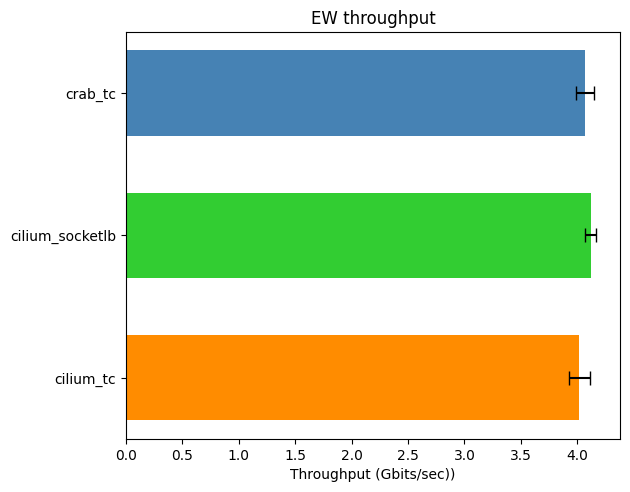

In [4]:
bar_positions = np.arange(len(iperf_means))
height = 0.6
colors = ['#FF8C00', '#32CD32', '#4682B4']
plt.barh(bar_positions, iperf_means, xerr=iperf_std_devs, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'cilium_socketlb', 'crab_tc'])
plt.xlabel('Throughput (Gbits/sec))')
plt.tight_layout()
plt.title("EW throughput")
plt.show()

In [5]:
cilium_tc_ew_RR = [[154,178,223], [154,179,228], [153,176,217], [153,176,216], [153,176,217], [154,179,232], [153,177,221], [153,176,216], [154,177,222], [153,177,222]]
cilium_socketlb_ew_RR = [[155,179,224], [154,179,227], [153,176,217], [153,176,217], [153,175,212], [153,176,216], [155,179,227], [153,176,219], [153,175,211], [153,175,211]]
crab_tc_ew_RR = [[153,175,217], [152,174,212], [153,174,214], [153,175,218], [152,175,214], [154,179,229], [153,177,224], [153,177,224], [153,176,220], [153,176,223]]

cilium_tc_ew_RR_50per = [x[0] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_50per = [x[0] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_50per = [x[0] for x in crab_tc_ew_RR]
cilium_tc_ew_RR_90per = [x[1] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_90per = [x[1] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_90per = [x[1] for x in crab_tc_ew_RR]
cilium_tc_ew_RR_99per = [x[2] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_99per = [x[2] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_99per = [x[2] for x in crab_tc_ew_RR]

ew_RR_50per_means = [np.mean(cilium_tc_ew_RR_50per), np.mean(cilium_socketlb_ew_RR_50per), np.mean(crab_tc_ew_RR_50per)]
ew_RR_90per_means = [np.mean(cilium_tc_ew_RR_90per), np.mean(cilium_socketlb_ew_RR_90per), np.mean(crab_tc_ew_RR_90per)]
ew_RR_99per_means = [np.mean(cilium_tc_ew_RR_99per), np.mean(cilium_socketlb_ew_RR_99per), np.mean(crab_tc_ew_RR_99per)]

ew_RR_50per_stds = [np.std(cilium_tc_ew_RR_50per), np.std(cilium_socketlb_ew_RR_50per), np.std(crab_tc_ew_RR_50per)]
ew_RR_90per_stds = [np.std(cilium_tc_ew_RR_90per), np.std(cilium_socketlb_ew_RR_90per), np.std(crab_tc_ew_RR_90per)]
ew_RR_99per_stds = [np.std(cilium_tc_ew_RR_99per), np.std(cilium_socketlb_ew_RR_99per), np.std(crab_tc_ew_RR_99per)]


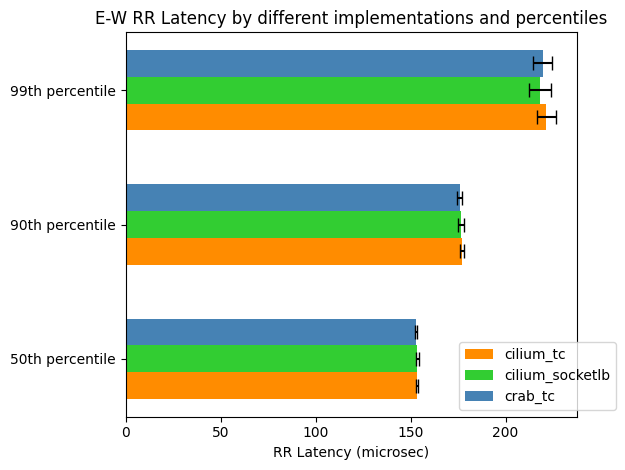

In [6]:

percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_RR_50per_means, ew_RR_50per_stds), 
                                  (ew_RR_90per_means, ew_RR_90per_stds), 
                                  (ew_RR_99per_means, ew_RR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('RR Latency (microsec)')
ax.set_title('E-W RR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0))

plt.tight_layout()
plt.show()

In [7]:
cilium_tc_ew_CRR = [[704,808,950], [705,826,1543], [707,832,1696], [707,824,1206], [708,826,1237], [707,832,1657], [710,830,1115], [705,818,1076], [707,835,1667], [713,846,1478]]
cilium_socketlb_ew_CRR = [[739,872,1047], [730,860,1630], [731,875,2000], [729,842,1166], [731,863,1854], [729,849,1460], [729,839,1097], [728,852,1765], [739,880,1531], [742,880,1167]]
crab_tc_ew_CRR = [[764,893,1062], [773,952,1171], [764,881,1048], [773,904,1066], [760,875,1017], [764,886,1044], [769,892,1125], [764,880,1037], [764,887,1051], [761,888,1127]]

cilium_tc_ew_CRR_50per = [x[0] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_50per = [x[0] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_50per = [x[0] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_90per = [x[1] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_90per = [x[1] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_90per = [x[1] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_99per = [x[2] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_99per = [x[2] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_99per = [x[2] for x in crab_tc_ew_CRR]

ew_CRR_50per_means = [np.mean(cilium_tc_ew_CRR_50per), np.mean(cilium_socketlb_ew_CRR_50per), np.mean(crab_tc_ew_CRR_50per)]
ew_CRR_90per_means = [np.mean(cilium_tc_ew_CRR_90per), np.mean(cilium_socketlb_ew_CRR_90per), np.mean(crab_tc_ew_CRR_90per)]
ew_CRR_99per_means = [np.mean(cilium_tc_ew_CRR_99per), np.mean(cilium_socketlb_ew_CRR_99per), np.mean(crab_tc_ew_CRR_99per)]

ew_CRR_50per_stds = [np.std(cilium_tc_ew_CRR_50per), np.std(cilium_socketlb_ew_CRR_50per), np.std(crab_tc_ew_CRR_50per)]
ew_CRR_90per_stds = [np.std(cilium_tc_ew_CRR_90per), np.std(cilium_socketlb_ew_CRR_90per), np.std(crab_tc_ew_CRR_90per)]
ew_CRR_99per_stds = [np.std(cilium_tc_ew_CRR_99per), np.std(cilium_socketlb_ew_CRR_99per), np.std(crab_tc_ew_CRR_99per)]

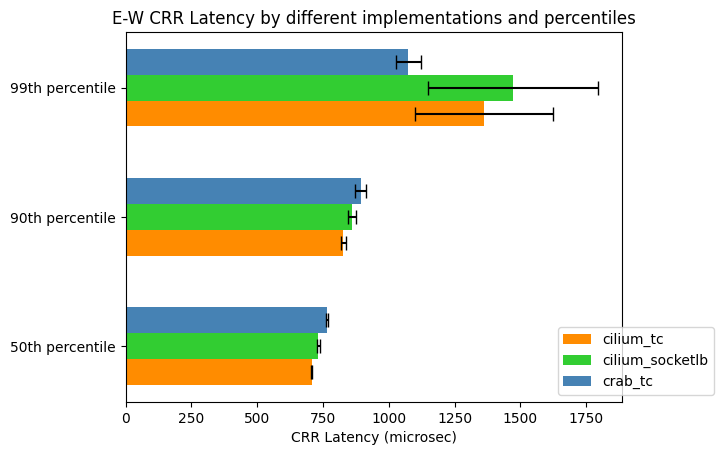

In [8]:
percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_CRR_50per_means, ew_CRR_50per_stds), 
                                  (ew_CRR_90per_means, ew_CRR_90per_stds), 
                                  (ew_CRR_99per_means, ew_CRR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('CRR Latency (microsec)')
ax.set_title('E-W CRR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))

plt.show()

In [9]:
cilium_tc_iperf_array = [764, 745, 751, 746, 746, 748, 742, 746, 725, 742]
crab_tc_iperf_array = [745, 744, 748, 776, 741, 744, 744, 745, 745, 744]
iperf_means = [np.mean(cilium_tc_iperf_array), np.mean(crab_tc_iperf_array)]
iperf_std = [np.std(cilium_tc_iperf_array), np.std(crab_tc_iperf_array)]

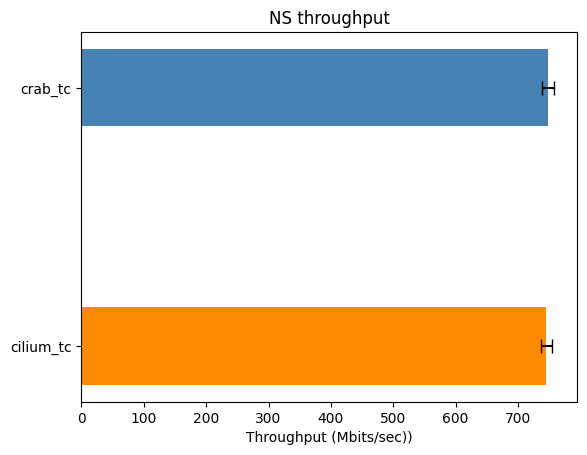

In [10]:
bar_positions = np.arange(len(iperf_means))
height = 0.3
colors = ['#FF8C00', '#4682B4']
plt.barh(bar_positions, iperf_means, xerr=iperf_std, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'crab_tc'])
plt.xlabel('Throughput (Mbits/sec))')

plt.title("NS throughput")
plt.show()

In [11]:
cilium_tc_ns_CRR = [[638,755,1363], [655,815,1300], [648,784,1241], [640,762,1381], [632,820,1563], [635,753,1304], [649,761,1215], [642,726,1145], [648,765,1313], [632,820,1563]]
crab_tc_ns_CRR = [[647,818,1452], [630,786,1544], [633,768,1445], [638,737,1302], [633,758,1546], [628,865,2082], [647,733,1218], [629,788,1560], [627,755,1296], [645,785,1625]]

cilium_tc_ns_RR_50per = [x[0] for x in cilium_tc_ns_CRR]
cilium_tc_ns_RR_90per = [x[1] for x in cilium_tc_ns_CRR]
cilium_tc_ns_RR_99per = [x[2] for x in cilium_tc_ns_CRR]

crab_tc_ns_RR_50per = [x[0] for x in crab_tc_ns_CRR]
crab_tc_ns_RR_90per = [x[1] for x in crab_tc_ns_CRR]
crab_tc_ns_RR_99per = [x[2] for x in crab_tc_ns_CRR]

ns_CRR_50per_means = [np.mean(cilium_tc_ns_RR_50per), np.mean(crab_tc_ns_RR_50per)]
ns_CRR_90per_means = [np.mean(cilium_tc_ns_RR_90per), np.mean(crab_tc_ns_RR_90per)]
ns_CRR_99per_means = [np.mean(cilium_tc_ns_RR_99per), np.mean(crab_tc_ns_RR_99per)]

ns_CRR_50per_stds = [np.std(cilium_tc_ns_RR_50per), np.std(crab_tc_ns_RR_50per)]
ns_CRR_90per_stds = [np.std(cilium_tc_ns_RR_90per), np.std(crab_tc_ns_RR_90per)]
ns_CRR_99per_stds = [np.std(cilium_tc_ns_RR_99per), np.std(crab_tc_ns_RR_99per)]

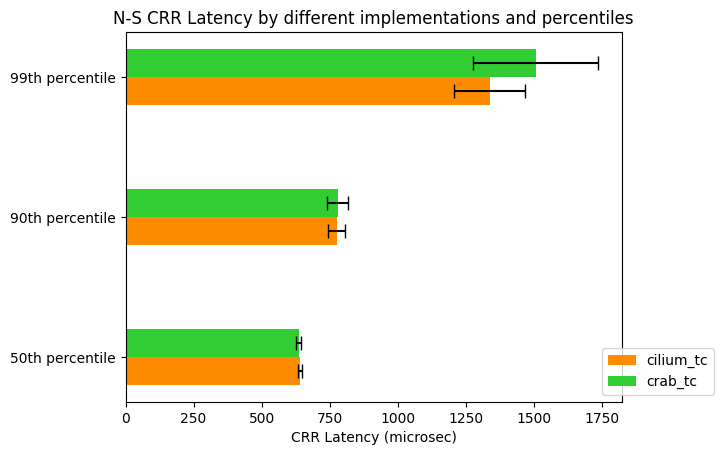

In [12]:
percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ns_CRR_50per_means, ns_CRR_50per_stds), 
                                  (ns_CRR_90per_means, ns_CRR_90per_stds), 
                                  (ns_CRR_99per_means, ns_CRR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('CRR Latency (microsec)')
ax.set_title('N-S CRR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))

plt.show()